In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
# Generate x values
x = np.linspace(-5, 5, 200).reshape(-1, 1)  # from -5 to 5

# Create a bell-shaped curve with noise
y = np.exp(-x**2) + 0.00008*x**5 + np.random.normal(0, 0.1, size=x.shape)  # e^(-x^2) + noise

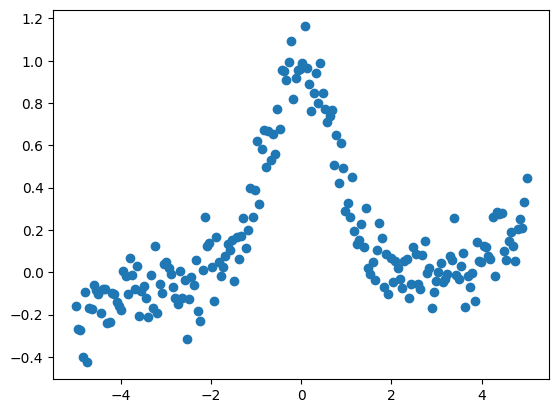

In [127]:
plt.scatter(x, y)

In [129]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [132]:
from sklearn.metrics import r2_score
r2_score(y_test, dtr.predict(x_test))

0.7730009298769782

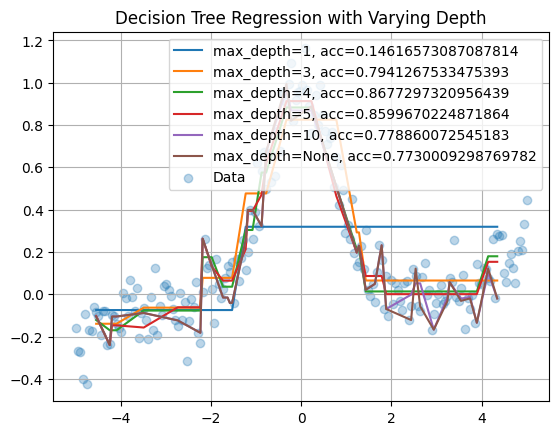

In [138]:
X_sorted = np.sort(x_test, axis=0)

for d in [1, 3, 4, 5, 10, None]:
    reg = DecisionTreeRegressor(max_depth=d, random_state=42)
    reg.fit(x_train, y_train)
    plt.plot(X_sorted, reg.predict(X_sorted), label=f"max_depth={d}, acc={r2_score(y_test, reg.predict(x_test))}")

plt.scatter(x, y, alpha=0.3, label="Data")
plt.title("Decision Tree Regression with Varying Depth")
plt.legend()
plt.grid(True)
plt.show()
